#  <center> Taller  de Aprendizaje Automático </center>
##  <center> Taller 6: Fashion MNIST  </center>

En esta actividad se diseñará y entrenará una arquitectura para clasificar las imágenes del dataset *Fashion MNIST*. 

## Objetivos

 - Adquirir experiencia práctica en la implementación de redes neuronales con la biblioteca *keras*
 - Evaluar la influencia que tienen en el entrenamiento de una *red profunda* la inclusión de técnicas como *Batch Normalization* o *Dropout* en la arquitectura de la red.
 - Evaluar el impacto de la *inicialización* de los pesos en el entrenamiento de una *red profunda*.
 - Diseñar, entrenar y evaluar arquitecturas para clasificar imágenes.  


In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.10.1
GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/TAA-fing/TAA-2025/blob/main/talleres/taller6_Fashion-MNIST.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Ejecutar en Google Colab</a>
  </td>
</table>

In [12]:
from comet_ml import Experiment
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

Los paquetes faltantes se pueden instalar desde el notebook haciendo:     
*!pip install paquete_faltante*

### Parte 1 - Levantar los datos

Se trabajará con el conjunto de datos *Fashion MNIST* disponible en [*Keras*](https://keras.io/api/datasets/fashion_mnist/). Levantar los datos y separar, de los datos disponibles para entrenamiento, un subconjunto de 10000 muestras para validación. 

In [20]:

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:10000] / 255.0, X_train_full[10000:] / 255.0
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]

### Parte 2  - Exploración de datos

Como es habitual, una buena práctica es explorar los datos para familiarizarse con el problema. En este caso, además de en keras, el *dataset* está disponible en *Tensorflow Datasets*. 

Conteste a las siguientes preguntas:        
    - ¿Cuántas imágenes hay disponibles? ¿De qué tamaño son?       
    - ¿Cuál es el tipo de dato? ¿Es adecuado?         
Muestre un ejemplo de cada clase.

In [7]:
# Hay 60000 imagenes disponibles de 28*28 del tipo greyscale con dtype uint8
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

    




### Parte 3 - Un primer modelo

Construya una red neuronal totalmente conectada de 20 capas y 100 neuronas por capa. Para ello se sugiere completar la implementación de la función `fully_connected_model`. Utilice *relu* como función de activación y *sgd* como optimizador.  Indique cuántos parámetros tiene la red.

In [25]:
def fully_connected_model(input_shape, n_hiddens, n_neurons, activation='relu', 
                        optimizer='sgd', learning_rate = 1e-3):
    
    '''
    Entrada:
        input_shape: [M,N]
        n_hiddens: número de capas ocultas
        n_neurons: número de neuronas en cada capa oculta
        activation: función de activación de las neuronas. Por defecto 'relu'.
        optimizer: método de optimización. Por defecto 'sgd'.
        learning_rate: tasa de aprendizaje del optimizador. Por defecto 1e-3.
    Salida:
        model: modelo generado
    '''
    model = keras.models.Sequential()
    model.add( tf.keras.layers.Flatten(input_shape =  input_shape))
    for i in range(n_hiddens):
        model.add(tf.keras.layers.Dense(n_neurons, activation= 'relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    if optimizer=='sgd':
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate= learning_rate), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    else:
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= learning_rate),  loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [26]:
X_train.shape

(50000, 28, 28)

### Parte 4 -  Un primer entrenamiento

Entrene el modelo generado en la parte anterior durante 10 épocas para los siguientes valores de *learning rate*: [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]. Muestre los desempeños en los conjuntos de entrenamiento y validación. 

In [27]:
learning_rates = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
results = []

for lr in learning_rates:
    model = fully_connected_model(input_shape=X_train.shape[1:], 
                                  n_hiddens=20, n_neurons=100, 
                                  activation='relu', 
                                  optimizer='sgd', 
                                  learning_rate=lr)
    history = model.fit(X_train, y_train, 
                        validation_data=(X_valid, y_valid),
                        epochs=10, 
                        verbose=0)
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    results.append((lr, train_acc, val_acc))
    print(f"Acc. Entrenamiento: {train_acc:.4f} - Acc. Validación: {val_acc:.4f}")

# Mostrar resultados en tabla
print("\nResultados finales:")
print("{:<10} {:<20} {:<20}".format("LR", "Train Accuracy", "Validation Accuracy"))
for lr, train_acc, val_acc in results:
    print("{:<10} {:<20.4f} {:<20.4f}".format(lr, train_acc, val_acc))

Acc. Entrenamiento: 0.2441 - Acc. Validación: 0.2531
Acc. Entrenamiento: 0.2188 - Acc. Validación: 0.2130
Acc. Entrenamiento: 0.4768 - Acc. Validación: 0.4993
Acc. Entrenamiento: 0.8583 - Acc. Validación: 0.8334
Acc. Entrenamiento: 0.8400 - Acc. Validación: 0.8190

Resultados finales:
LR         Train Accuracy       Validation Accuracy 
0.0001     0.2441               0.2531              
0.0005     0.2188               0.2130              
0.001      0.4768               0.4993              
0.005      0.8583               0.8334              
0.01       0.8400               0.8190              


### Parte 5: - Cambio de Inicialización 

**5a)** Repita el experimento pero cambiando el método de inicialización de los pesos. En vez de utilizar la inicialización por defecto, utilice 'he_normal'. Comente como cambian los resultados.

In [22]:
def fully_connected_model2(input_shape, n_hiddens, n_neurons, activation='relu', 
                        optimizer='sgd', learning_rate = 1e-3):
    
    '''
    Entrada:
        input_shape: [M,N]
        n_hiddens: número de capas ocultas
        n_neurons: número de neuronas en cada capa oculta
        activation: función de activación de las neuronas. Por defecto 'relu'.
        optimizer: método de optimización. Por defecto 'sgd'.
        learning_rate: tasa de aprendizaje del optimizador. Por defecto 1e-3.
    Salida:
        model: modelo generado
    '''
    model = keras.models.Sequential()
    model.add( tf.keras.layers.Flatten(input_shape =  input_shape))
    for i in range(n_hiddens):
        model.add(tf.keras.layers.Dense(n_neurons, activation=activation,kernel_initializer='he_normal'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    if optimizer=='sgd':
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate= learning_rate), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    else:
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= learning_rate),  loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [24]:
learning_rates = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
results = []

for lr in learning_rates:
    model = fully_connected_model2(input_shape=X_train.shape[1:], 
                                  n_hiddens=20, n_neurons=100, 
                                  activation='relu', 
                                  optimizer='sgd', 
                                  learning_rate=lr)
    history = model.fit(X_train, y_train, 
                        validation_data=(X_valid, y_valid),
                        epochs=10, 
                        verbose=0)
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    results.append((lr, train_acc, val_acc))
    print(f"Acc. Entrenamiento: {train_acc:.4f} - Acc. Validación: {val_acc:.4f}")

# Mostrar resultados en tabla
print("\nResultados finales:")
print("{:<10} {:<20} {:<20}".format("LR", "Train Accuracy", "Validation Accuracy"))
for lr, train_acc, val_acc in results:
    print("{:<10} {:<20.4f} {:<20.4f}".format(lr, train_acc, val_acc))

C:\Users\ureca\miniconda3\envs\TAA-py311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Acc. Entrenamiento: 0.7582 - Acc. Validación: 0.7437
Acc. Entrenamiento: 0.8390 - Acc. Validación: 0.8349
Acc. Entrenamiento: 0.8579 - Acc. Validación: 0.8540
Acc. Entrenamiento: 0.8816 - Acc. Validación: 0.8676
Acc. Entrenamiento: 0.8844 - Acc. Validación: 0.8763

Resultados finales:
LR         Train Accuracy       Validation Accuracy 
0.0001     0.7582               0.7437              
0.0005     0.8390               0.8349              
0.001      0.8579               0.8540              
0.005      0.8816               0.8676              
0.01       0.8844               0.8763              


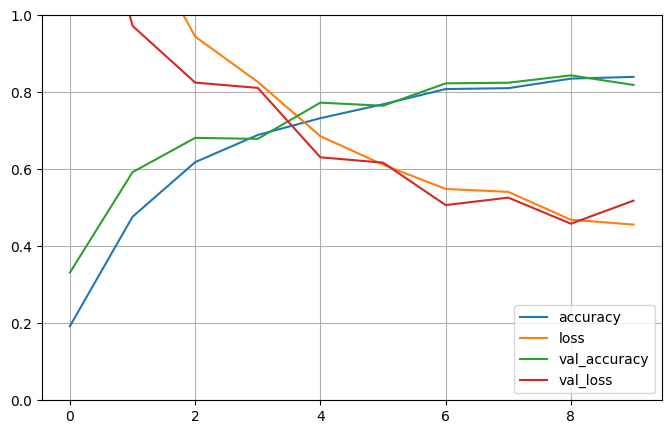

In [28]:
import pandas as pd
import matplotlib.pyplot as plt  

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  
plt.show()


**5b) (opcional):** Probar otras formas de inicialización. Por ejemplo, ¿Qué pasa si se utiliza 'random_normal'?

### Parte 6 - Batch Normalization

Modifique la implementación de la función *fully_connected_model* para que admita la posibilidad de agregar capas de *batch normalization*. En caso de utilizar *batch normalization* coloque dichas capas luego de las capas densas y antes de las activaciones, tal como fue propuesto en el [paper original](https://arxiv.org/pdf/1502.03167.pdf). 

In [29]:
def fully_connected_model_con_batch(input_shape, n_hiddens, n_neurons, activation='relu', 
                          optimizer='sgd', learning_rate=1e-3, 
                          batch_norm=False):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))

    for _ in range(n_hiddens):
        model.add(tf.keras.layers.Dense(n_neurons, kernel_initializer='he_normal', use_bias=not batch_norm))
        
        if batch_norm:
            model.add(tf.keras.layers.BatchNormalization())  

        model.add(tf.keras.layers.Activation(activation))   

    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    if optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [30]:
model = fully_connected_model_con_batch(input_shape=(28, 28), n_hiddens=2, n_neurons=300, batch_norm=True)
model.summary()

C:\Users\ureca\miniconda3\envs\TAA-py311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_26 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_546 (Dense)                    │ (None, 300)                 │         235,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_547 (Dense)                    │ (None, 300)                 │          90,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_548 (Dense)                    │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 330,610 (1.26 MB)

 Trainable params: 329,410 (1.26 MB)

 Non-trainable params: 1,200 (4.69 KB)

**6a)** ¿Cuántos parámetros tiene el modelo con *batch normalization*? ¿Qué son y para que se usan los *Non-trainable-parameters*?

In [ ]:
# 330610 params. Trainable son los pesos y non trainable son las moving mean y variance dadas por la capa de batch normalization

**6b)** Repita el experimento de la **parte 4** pero ahora utilizando el modelo con *batch normalization*. Para este experimento vuelva a la inicialización de los pesos por defecto ('glorot_uniform').

In [33]:
def fully_connected_model_p6(input_shape, n_hiddens, n_neurons, activation='relu', 
                          optimizer='sgd', learning_rate=1e-3, 
                          batch_norm=False):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))

    for _ in range(n_hiddens):
        model.add(tf.keras.layers.Dense(n_neurons, 
                                        kernel_initializer='glorot_uniform', 
                                        use_bias=not batch_norm))
        if batch_norm:
            model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation(activation))
    
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    if optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

In [34]:
learning_rates = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
histories = {}

for lr in learning_rates:
    print(f"\nEntrenando con learning rate = {lr}")
    model = fully_connected_model_p6(input_shape=(28, 28), 
                                  n_hiddens=20, 
                                  n_neurons=100, 
                                  activation='relu',
                                  optimizer='sgd',
                                  learning_rate=lr,
                                  batch_norm=True)  
    history = model.fit(X_train, y_train, epochs=10, 
                        validation_data=(X_valid, y_valid),
                        verbose=0)
    histories[lr] = history


Entrenando con learning rate = 0.0001


C:\Users\ureca\miniconda3\envs\TAA-py311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Entrenando con learning rate = 0.0005

Entrenando con learning rate = 0.001

Entrenando con learning rate = 0.005

Entrenando con learning rate = 0.01


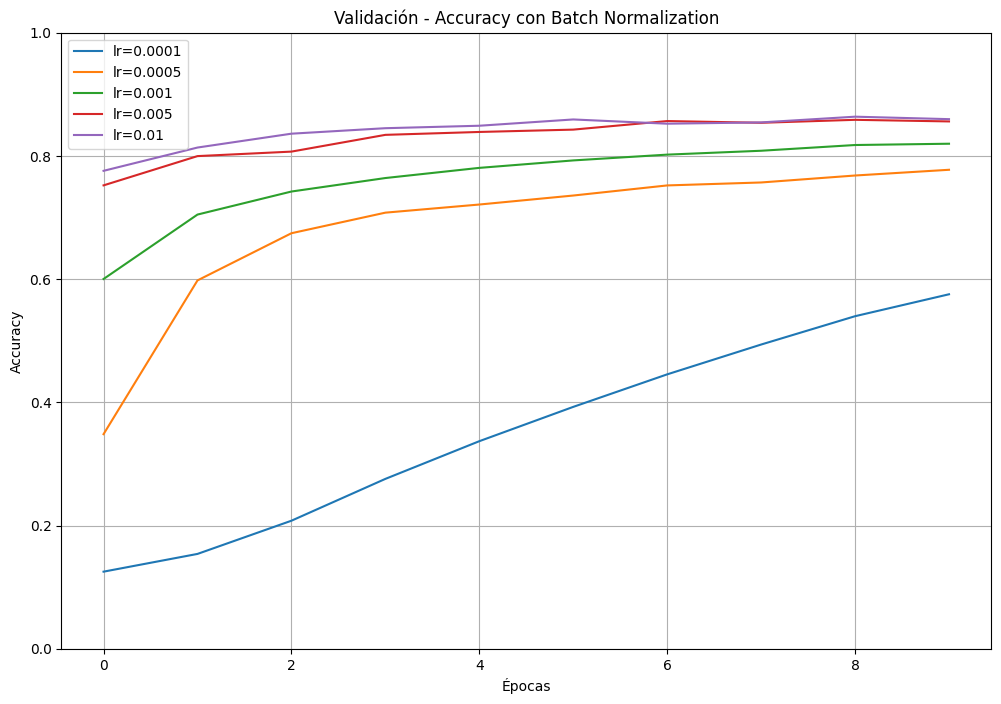


Resultados finales:
LR         Train Accuracy       Validation Accuracy 
0.0001     0.2441               0.2531              
0.0005     0.2188               0.2130              
0.001      0.4768               0.4993              
0.005      0.8583               0.8334              
0.01       0.8400               0.8190              
0.01       0.8571               0.8597              


In [39]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 8))
for lr, history in histories.items():
    val_acc = history.history['val_accuracy']
    plt.plot(val_acc, label=f"lr={lr}")
    
plt.title("Validación - Accuracy con Batch Normalization")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()


print("\nResultados finales:")
print("{:<10} {:<20} {:<20}".format("LR", "Train Accuracy", "Validation Accuracy"))
for lr, train_acc, val_acc in results:
    print("{:<10} {:<20.4f} {:<20.4f}".format(lr, train_acc, val_acc))

### Parte 7 -  Optimizador

**Parte 7a)** De ser necesario, modifique la implementación de la función `fully_connected_model()` para que permita optimizar utilizando el método *adam*. Repita el experimento de la **parte 4** pero modificando solamente el optimizador. Comente los cambios que observa.

In [41]:
learning_rates = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
results = []

for lr in learning_rates:
    model = fully_connected_model_con_batch(input_shape=X_train.shape[1:], 
                                  n_hiddens=20, n_neurons=100, 
                                  activation='relu', 
                                  optimizer='adam', 
                                  learning_rate=lr, batch_norm=False)
    history = model.fit(X_train, y_train, 
                        validation_data=(X_valid, y_valid),
                        epochs=10, 
                        verbose=0)
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    results.append((lr, train_acc, val_acc))
    print(f"Acc. Entrenamiento: {train_acc:.4f} - Acc. Validación: {val_acc:.4f}")

# Mostrar resultados en tabla
print("\nResultados finales:")
print("{:<10} {:<20} {:<20}".format("LR", "Train Accuracy", "Validation Accuracy"))
for lr, train_acc, val_acc in results:
    print("{:<10} {:<20.4f} {:<20.4f}".format(lr, train_acc, val_acc))

C:\Users\ureca\miniconda3\envs\TAA-py311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Acc. Entrenamiento: 0.8938 - Acc. Validación: 0.8785
Acc. Entrenamiento: 0.8847 - Acc. Validación: 0.8776
Acc. Entrenamiento: 0.8558 - Acc. Validación: 0.8563
Acc. Entrenamiento: 0.0996 - Acc. Validación: 0.0974
Acc. Entrenamiento: 0.1010 - Acc. Validación: 0.1027

Resultados finales:
LR         Train Accuracy       Validation Accuracy 
0.0001     0.8938               0.8785              
0.0005     0.8847               0.8776              
0.001      0.8558               0.8563              
0.005      0.0996               0.0974              
0.01       0.1010               0.1027              


**Parte 7b)** ¿Cambian los resultados del entrenamiento si en la parte anterior además de cambiar el optimizador se agrega *batch normalization* ?

In [42]:
learning_rates = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
results = []

for lr in learning_rates:
    model = fully_connected_model_con_batch(input_shape=X_train.shape[1:], 
                                  n_hiddens=20, n_neurons=100, 
                                  activation='relu', 
                                  optimizer='adam', 
                                  learning_rate=lr, batch_norm=True)
    history = model.fit(X_train, y_train, 
                        validation_data=(X_valid, y_valid),
                        epochs=10, 
                        verbose=0)
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    results.append((lr, train_acc, val_acc))
    print(f"Acc. Entrenamiento: {train_acc:.4f} - Acc. Validación: {val_acc:.4f}")

# Mostrar resultados en tabla
print("\nResultados finales:")
print("{:<10} {:<20} {:<20}".format("LR", "Train Accuracy", "Validation Accuracy"))
for lr, train_acc, val_acc in results:
    print("{:<10} {:<20.4f} {:<20.4f}".format(lr, train_acc, val_acc))

Acc. Entrenamiento: 0.8257 - Acc. Validación: 0.8579
Acc. Entrenamiento: 0.8656 - Acc. Validación: 0.8772
Acc. Entrenamiento: 0.8666 - Acc. Validación: 0.8598
Acc. Entrenamiento: 0.8504 - Acc. Validación: 0.8442
Acc. Entrenamiento: 0.8334 - Acc. Validación: 0.6917

Resultados finales:
LR         Train Accuracy       Validation Accuracy 
0.0001     0.8257               0.8579              
0.0005     0.8656               0.8772              
0.001      0.8666               0.8598              
0.005      0.8504               0.8442              
0.01       0.8334               0.6917              


### Parte 8  -  Red Neuronal Convolucional

**8a)** Escribir una función similar a la de la **parte 3** pero que construya una red neuronal convolucional con la siguiente arquitectura:
    
N * [Conv2D --> Conv2D --> Pool2D] → Flatten → Dense → Dense. 

donde *N* representa la cantidad de bloques [Conv2D --> Conv2D --> Pool2D] a utilizar. 

In [50]:
def cnn_model(input_shape, N=2, C1=64 , C2=32, tam1=3,tam2=3, n_neurons = 128, activation='relu', optimizer='adam', 
              learning_rate=1e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    
    for _ in range(N):    
        model.add(tf.keras.layers.Conv2D(filters=C1, kernel_size=tam1, padding='same', activation=activation))
        model.add(tf.keras.layers.Conv2D(filters=C2, kernel_size=tam2, padding='same', activation=activation))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=2))


    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_neurons, activation=activation))
    model.add(keras.layers.Dense(10, activation='softmax'))  

    
    if optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [53]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]


model_cnn = cnn_model(input_shape=X_train.shape[1:])
history = model_cnn.fit(X_train, y_train, 
                        validation_data=(X_valid, y_valid),
                        epochs=10, 
                        verbose=0)
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
results.append((lr, train_acc, val_acc))
print(f"Acc. Entrenamiento: {train_acc:.4f} - Acc. Validación: {val_acc:.4f}")

# Mostrar resultados en tabla
print("\nResultados finales:")
print("{:<10} {:<20} {:<20}".format("LR", "Train Accuracy", "Validation Accuracy"))
for lr, train_acc, val_acc in results:
    print("{:<10} {:<20.4f} {:<20.4f}".format(lr, train_acc, val_acc))

Acc. Entrenamiento: 0.9775 - Acc. Validación: 0.9229

Resultados finales:
LR         Train Accuracy       Validation Accuracy 
0.0001     0.8257               0.8579              
0.0005     0.8656               0.8772              
0.001      0.8666               0.8598              
0.005      0.8504               0.8442              
0.01       0.8334               0.6917              
0.01       0.9775               0.9229              


**8b)** Entrenar una realización de la red. Por ejemplo, utilizar:
- N=2
- 64 filtros de convolución de tamaño 3 en la primera capa del bloque
- 32 filtros de convolución de tamaño 3 en la segunda capa del bloque
- 128 neuronas en la primera capa densa 

**8c)** ¿Cuántos parámetros tiene el modelo?

In [55]:
model.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_42 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_864 (Dense)                    │ (None, 100)                 │          78,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_182              │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_302 (Activation)          │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_865 (Dense)                    │ (None, 100)                 │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_183              │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_303 (Activation)          │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_866 (Dense)                    │ (None, 100)                 │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_184              │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_304 (Activation)          │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_867 (Dense)                    │ (None, 100)                 │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_185              │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_305 (Activation)          │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_868 (Dense)                    │ (None, 100)                 │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_186              │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_306 (Activation)          │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_869 (Dense)                    │ (None, 100)                 │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_187              │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 824,232 (3.14 MB)

 Trainable params: 273,410 (1.04 MB)

 Non-trainable params: 4,000 (15.62 KB)

 Optimizer params: 546,822 (2.09 MB)

### Parte 9 - Entrenar la mejor arquitectura posible

En esta parte el objetivo será entrenar el mejor clasificador posible para *Fashion MNIST*. La única restricción es que el modelo de arquitectura tendrá que ser como el de la **parte 3** o como el de la **parte 8**. En ambos casos se podrán evaluar las siguientes variaciones:     
    - Número de capas y neuronas por capa en el modelo de la **parte3**     
    - Número de bloques, cantidad de filtros de bloque y tamaño de los filtros en el caso del modelo de la **parte 8**              
    - Distintas funciones de activación y métodos de inicialización de pesos     
    - Agregado de *Batch Normalization* y/o *Dropout*    
    - Distintos métodos de optimización y sus parámetros     

Para entrenar los modelos se recomienda la utilización de alguno de los [callbacks](https://keras.io/callbacks/) disponibles en *keras*. Por ejemplo: *early stopping* y *model checkpoint*.

In [57]:
def best_cnn_model(input_shape, N=2, C1=64 , C2=32, tam1=3,tam2=3, n_neurons = 128, activation='relu', optimizer='adam', 
              learning_rate=1e-3, dropout_rate = 0.3):
    
    model = keras.models.Sequential()
    for _ in range(N):
        model.add(tf.keras.layers.Conv2D(C1, kernel_size=tam1 , padding='same', kernel_initializer='he_normal'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation(activation))
        model.add(tf.keras.layers.Conv2D(C2, kernel_size=tam2, padding='same', kernel_initializer='he_normal'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation(activation))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        model.add(tf.keras.layers.Dropout(dropout_rate))

  
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_neurons, kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation(activation))
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(10, activation='softmax'))

    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

In [58]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

model = best_cnn_model(input_shape=X_train.shape[1:])

history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    batch_size=64,
                    callbacks=[early_stop, checkpoint])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 141ms/step - accuracy: 0.7458 - loss: 0.7190 - val_accuracy: 0.8932 - val_loss: 0.2862
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 134ms/step - accuracy: 0.8732 - loss: 0.3457 - val_accuracy: 0.9049 - val_loss: 0.2576
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.8919 - loss: 0.2909 - val_accuracy: 0.9082 - val_loss: 0.2480
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 130ms/step - accuracy: 0.9028 - loss: 0.2641 - val_accuracy: 0.9202 - val_loss: 0.2128
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.9096 - loss: 0.2463 - val_accuracy: 0.9287 - val_loss: 0.1955
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 131ms/step - accuracy: 0.9164 - loss: 0.2304 - val_accuracy: 0.9315 - val_loss: 0.1876
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 0.9189 - loss: 0.2219 - val_accuracy: 0.9292 - val_loss: 0.1900
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 131ms/step - accuracy: 0.9228 -